In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds

In [27]:
plt.rc('font', size=12)

In [28]:
RANDOM_SCORE = -281.4462259899989
EXPERT_SCORE = 12135.0

In [29]:
# Historical Medium-Replay
MP148 = get_results("MP148")
MP149 = get_results("MP149")

# Historical Medium-Expert
MP150 = get_results("MP150")
MP151 = get_results("MP151")

# Medium
MP521 = get_results("MP521")
MP522 = get_results("MP522")
MP523 = get_results("MP523")

# Medium-Replay
MP524 = get_results("MP524")
MP525 = get_results("MP525")
MP526 = get_results("MP526")

# Medium-Expert
MP527 = get_results("MP527")
MP528 = get_results("MP528")
MP529 = get_results("MP529")

# Replay
MP530 = get_results("MP530")
MP531 = get_results("MP531")
MP532 = get_results("MP532")

In [30]:
def determine_normalised_score(exps: list):
    final_returns = []
    for exp in exps:
        final_returns.append(exp.sac.result['evaluation/return-average'].iloc[-1])
    norm_scores = 100 * (np.array(final_returns)-RANDOM_SCORE)/(EXPERT_SCORE-RANDOM_SCORE)
    return f'{np.round(norm_scores.mean(),1)}±{np.round(norm_scores.std(),1)}'

In [31]:
print(f'Historical Medium-Replay: {determine_normalised_score([MP148, MP149])} - Target: 53.1±2.0')
print(f'Historical Medium-Expert: {determine_normalised_score([MP150, MP151])} - Target: 63.3±38.0')
print()
print(f'Random: {determine_normalised_score([MP530, MP531, MP532])} - Target: 35.4±2.5')
print(f'Medium: {determine_normalised_score([MP521, MP522, MP523])} - Target: 42.3±1.6')
print(f'Medium-Replay: {determine_normalised_score([MP524, MP525, MP526])} - Target: 53.1±2.0')
print(f'Medium-Expert: {determine_normalised_score([MP527, MP528, MP529])} - Target: 63.3±38.0')

Historical Medium-Replay: 52.9±4.1 - Target: 53.1±2.0
Historical Medium-Expert: 93.0±6.2 - Target: 63.3±38.0

Random: 36.1±0.8 - Target: 35.4±2.5
Medium: 46.5±0.7 - Target: 42.3±1.6
Medium-Replay: 53.5±0.6 - Target: 53.1±2.0
Medium-Expert: 68.1±8.9 - Target: 63.3±38.0


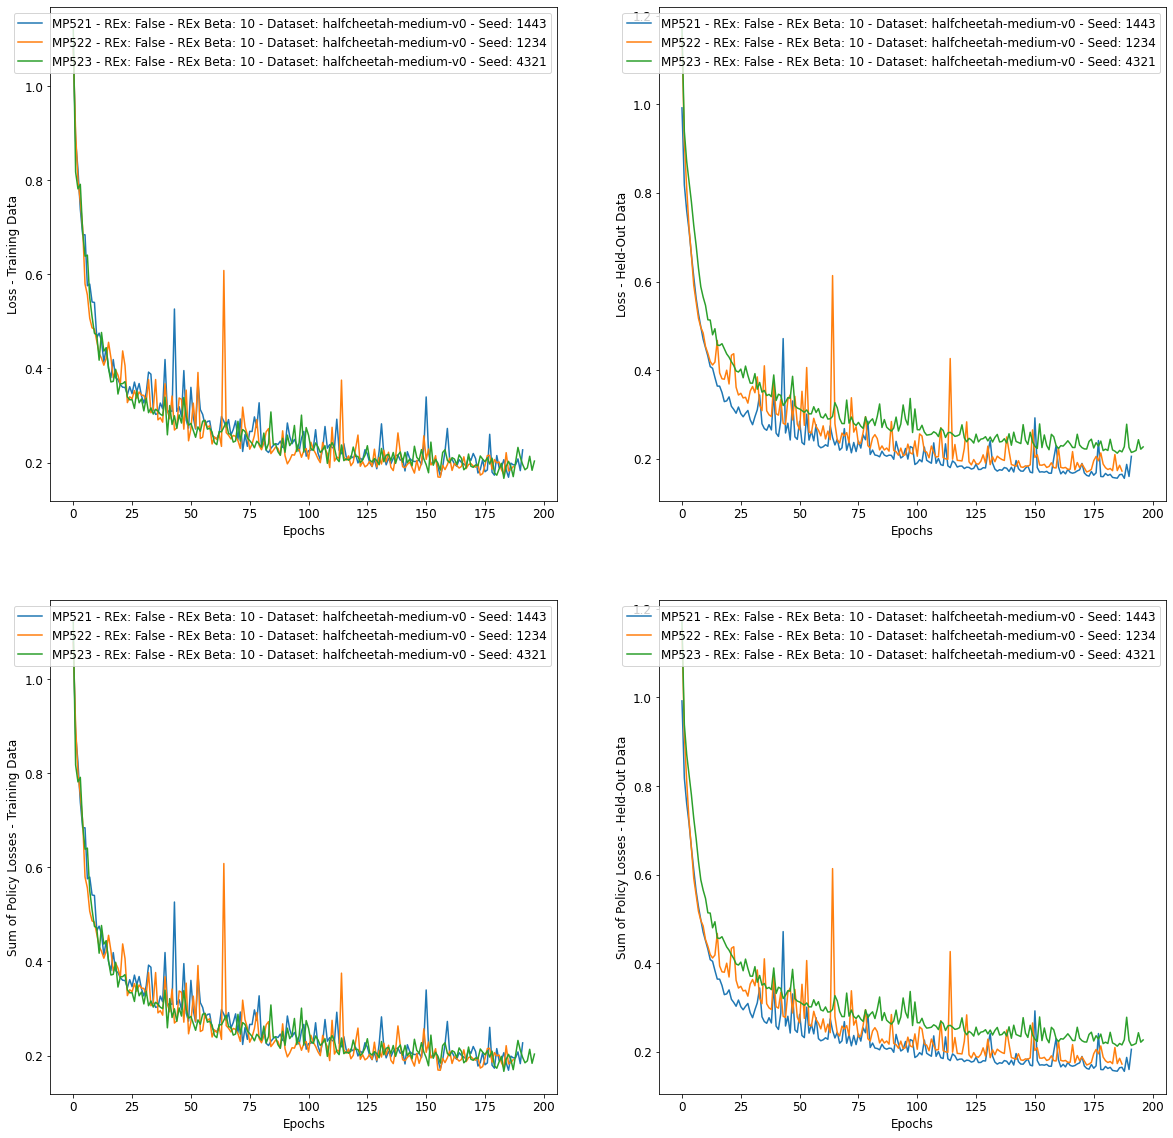

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP521,
    MP522,
    MP523
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    # ax[0,0].set_ylim(0,2.5
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    # ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

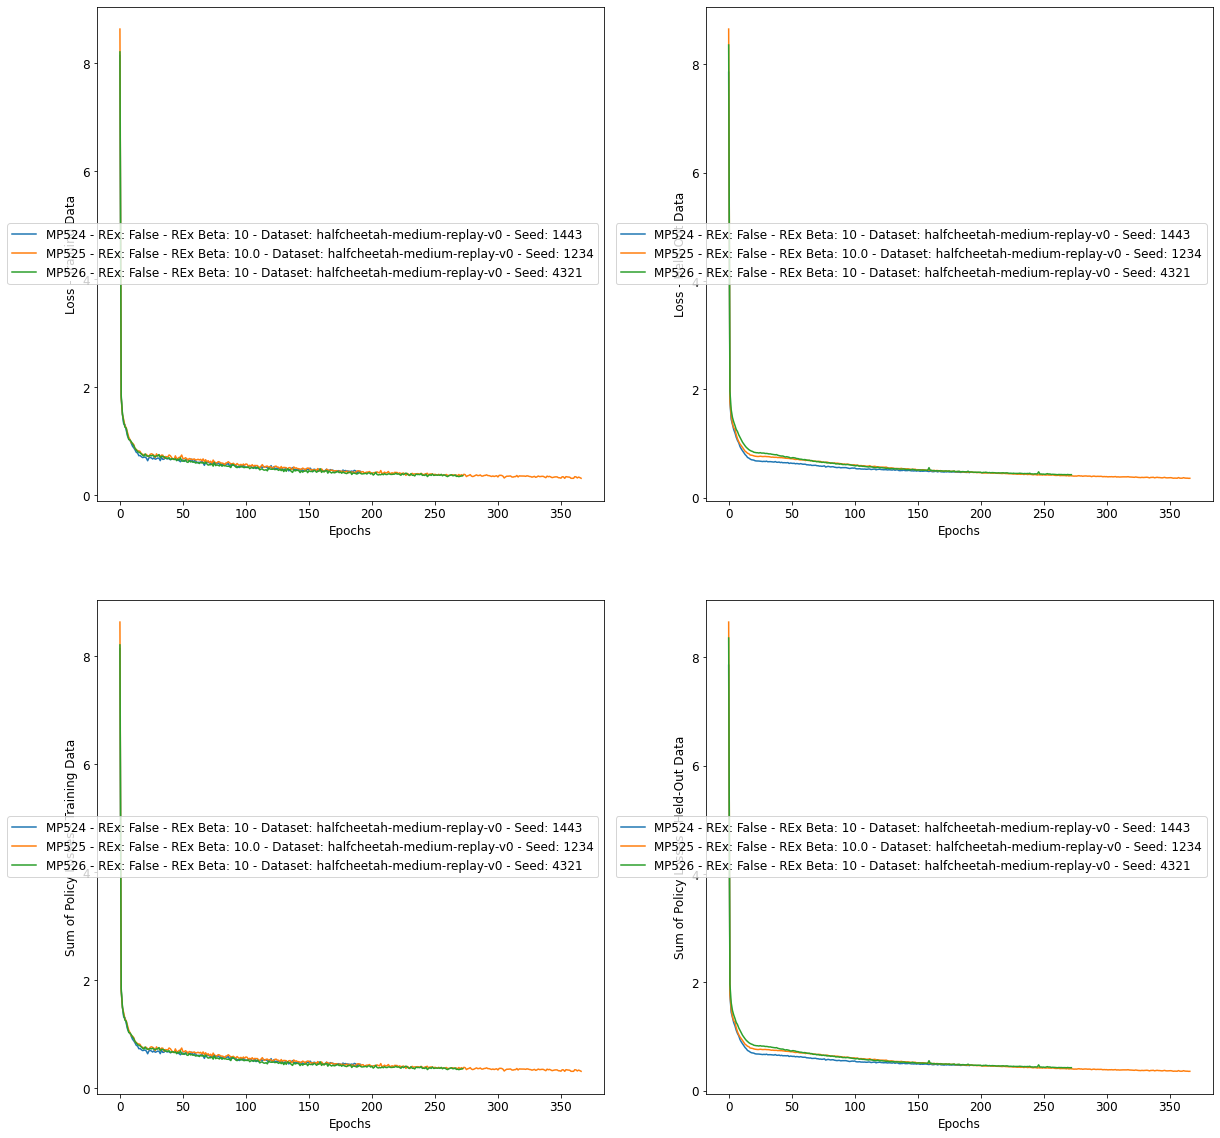

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP524,
    MP525,
    MP526
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    # ax[0,0].set_ylim(0,2.5
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    # ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

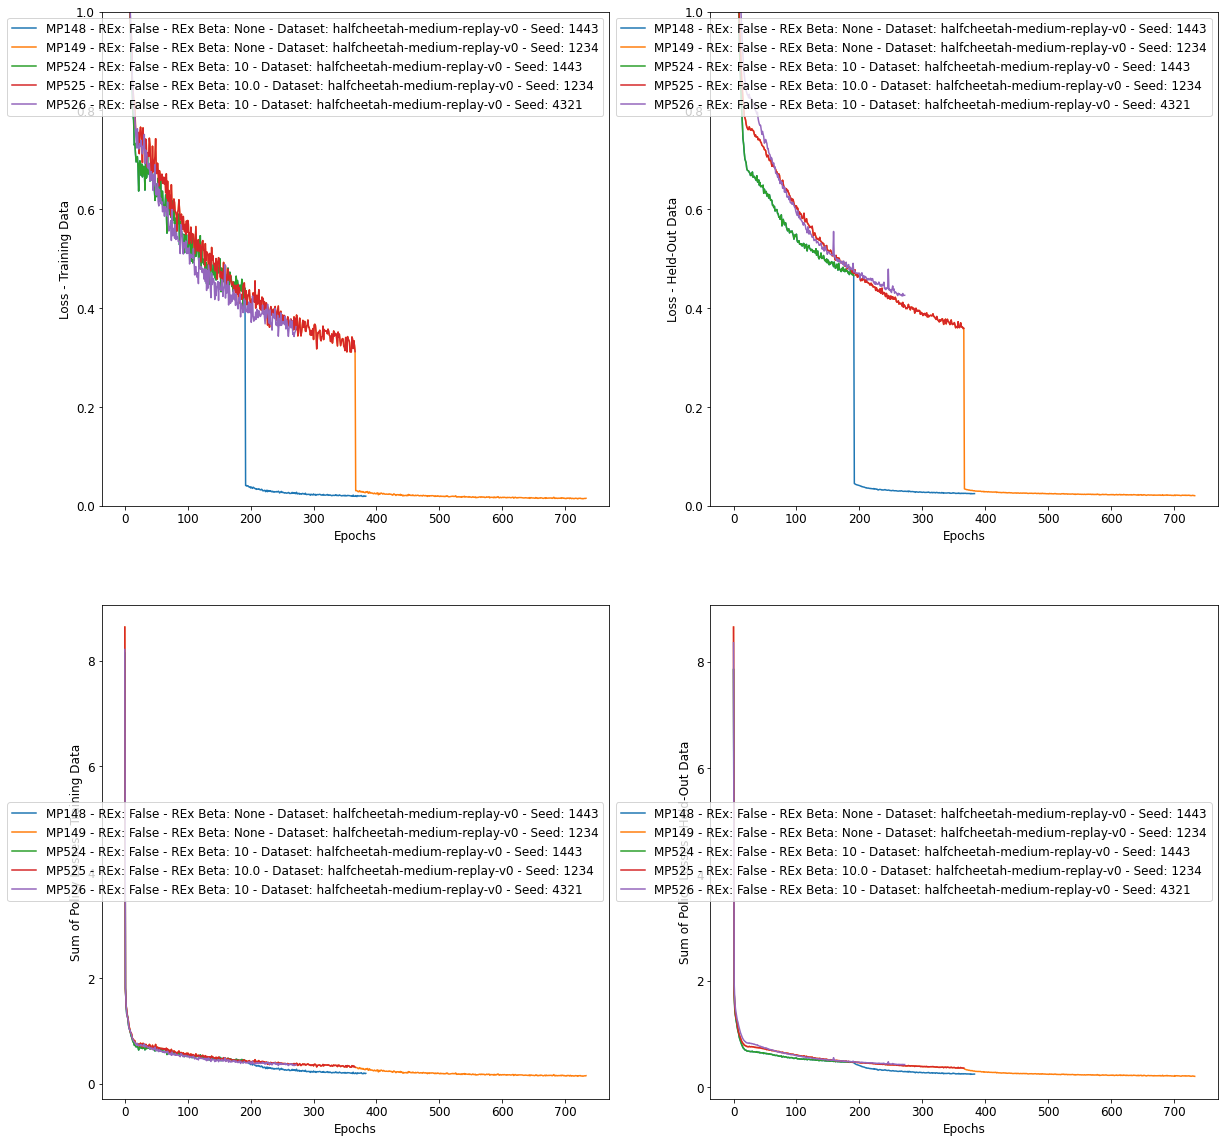

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP148,
    MP149,
    MP524,
    MP525,
    MP526
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,1.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,1.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

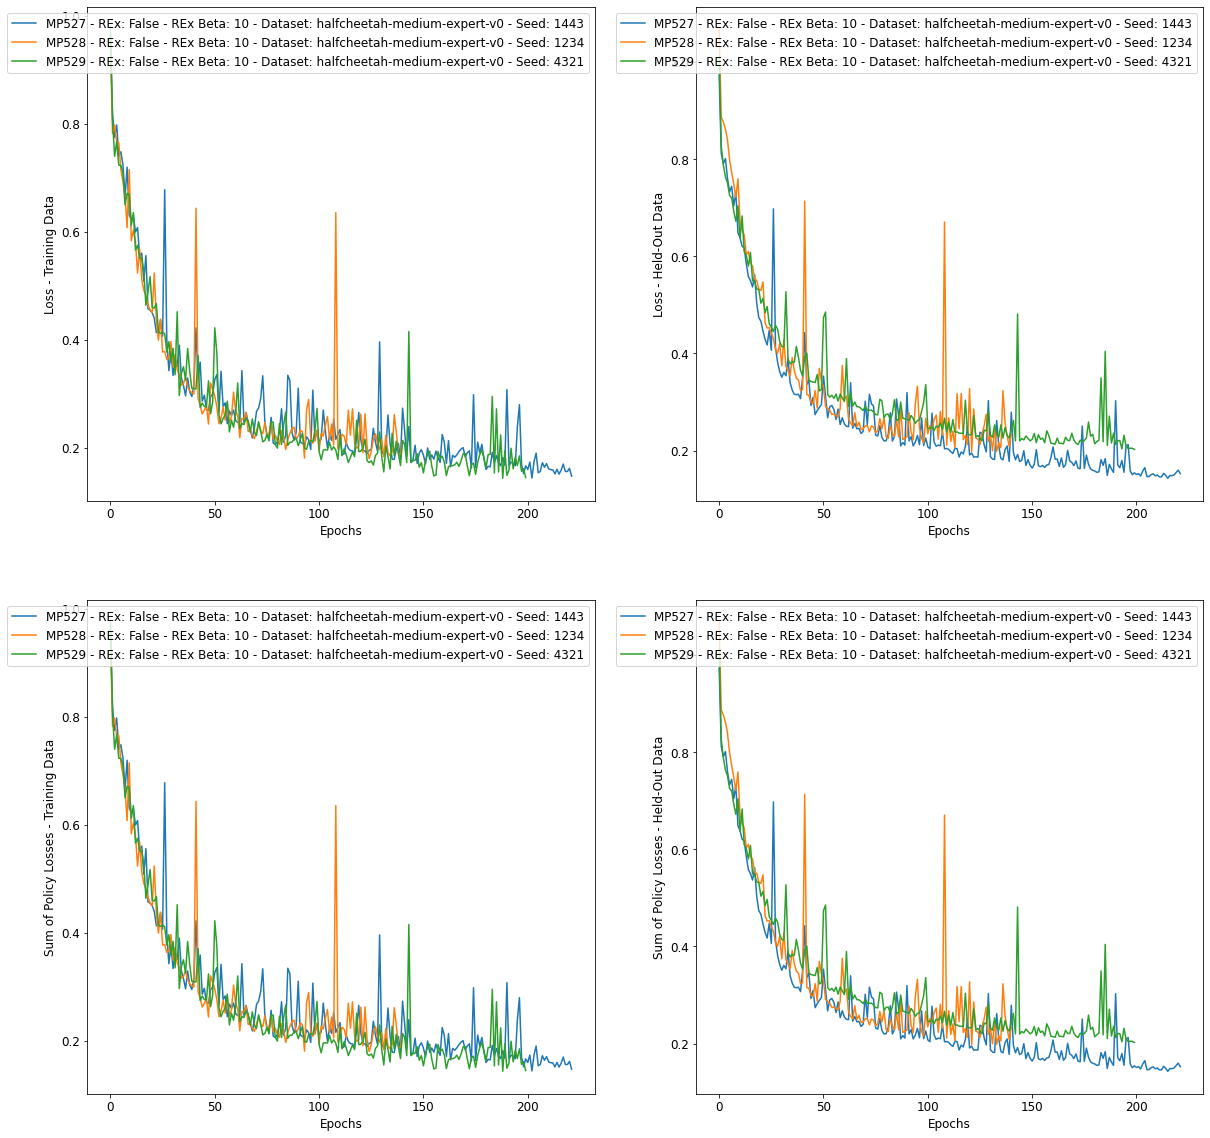

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP527,
    MP528,
    MP529
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    # ax[0,0].set_ylim(0,2.5
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    # ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

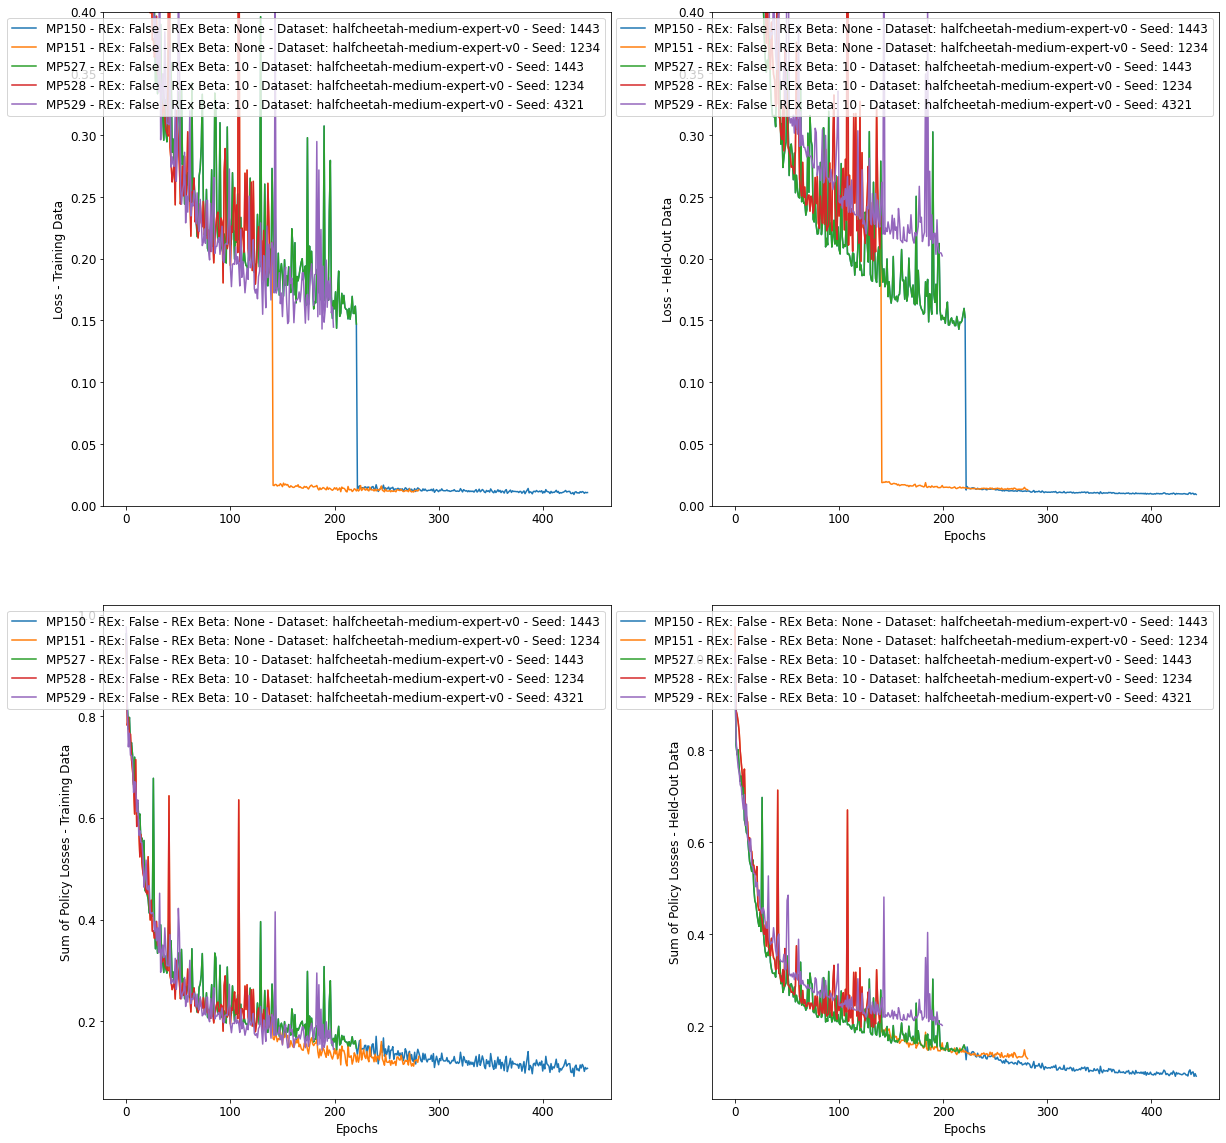

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP150,
    MP151,
    MP527,
    MP528,
    MP529
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,0.4)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,0.4)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

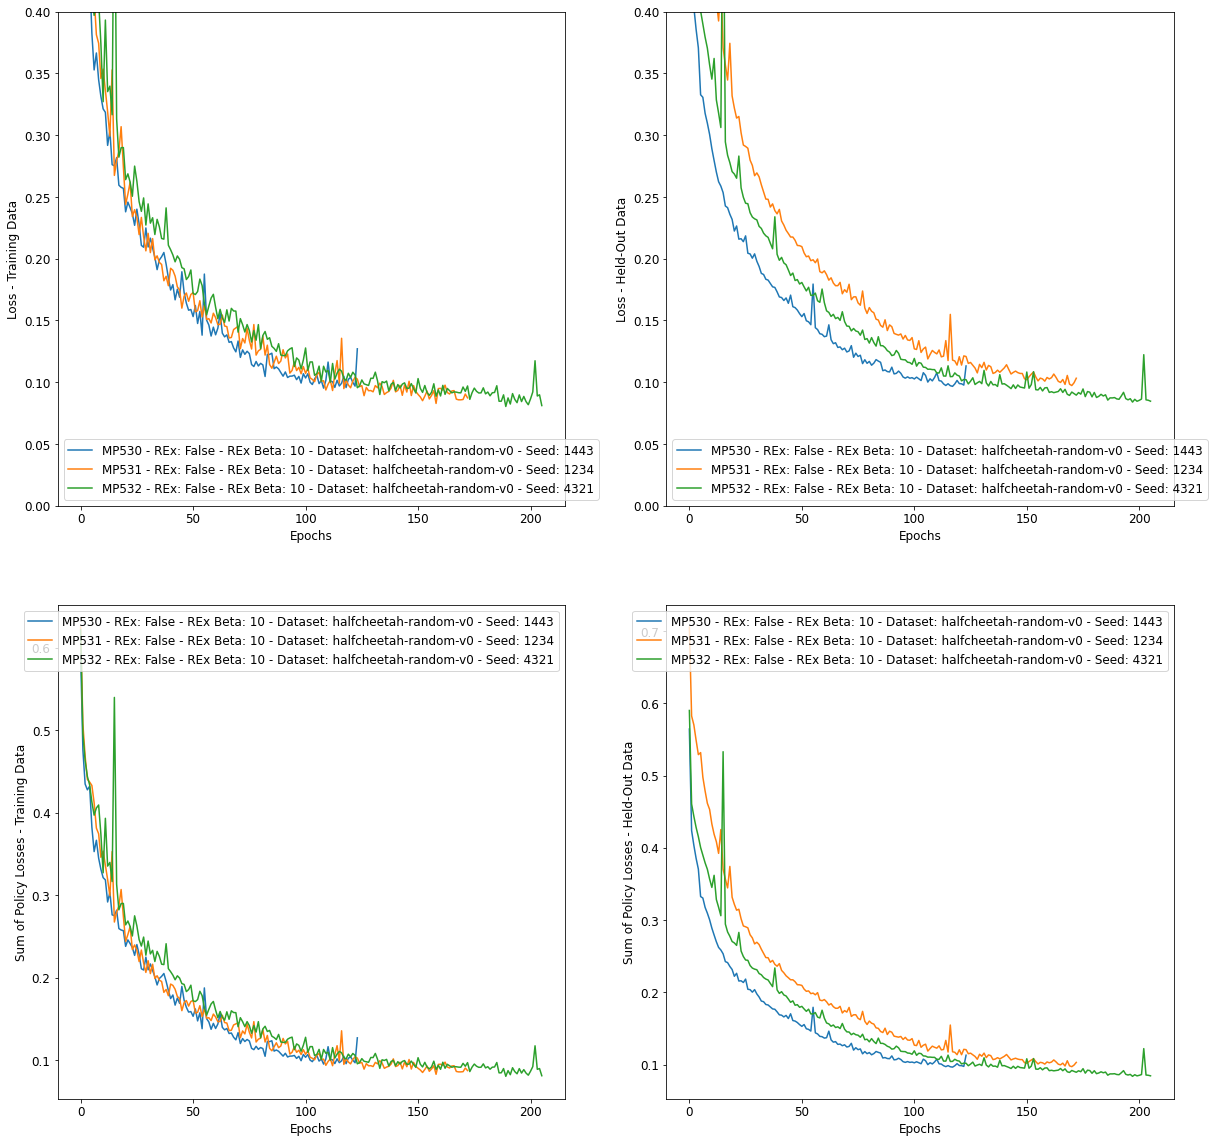

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP530,
    MP531,
    MP532
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,0.4)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,0.4)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[00:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

In [38]:
MP523.sac.result['timesteps_total'].iloc[-1]

981000

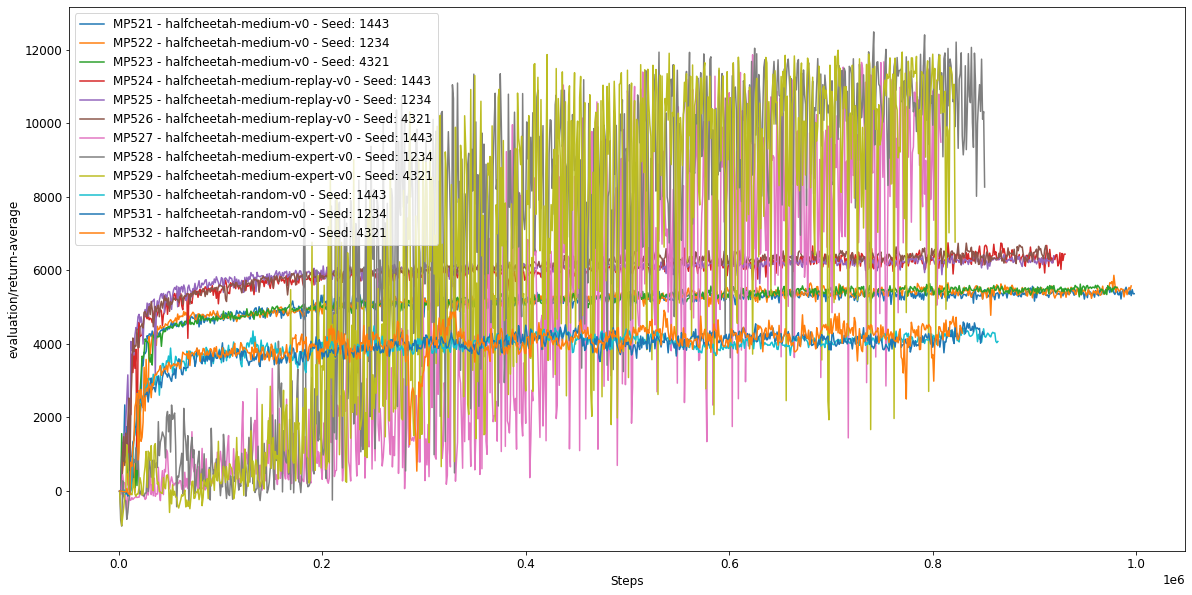

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP521,
    MP522,
    MP523,
    MP524,
    MP525,
    MP526,
    MP527,
    MP528,
    MP529,
    MP530,
    MP531,
    MP532,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

In [40]:
exp.sac.result['timesteps_total'].iloc[799]

800000

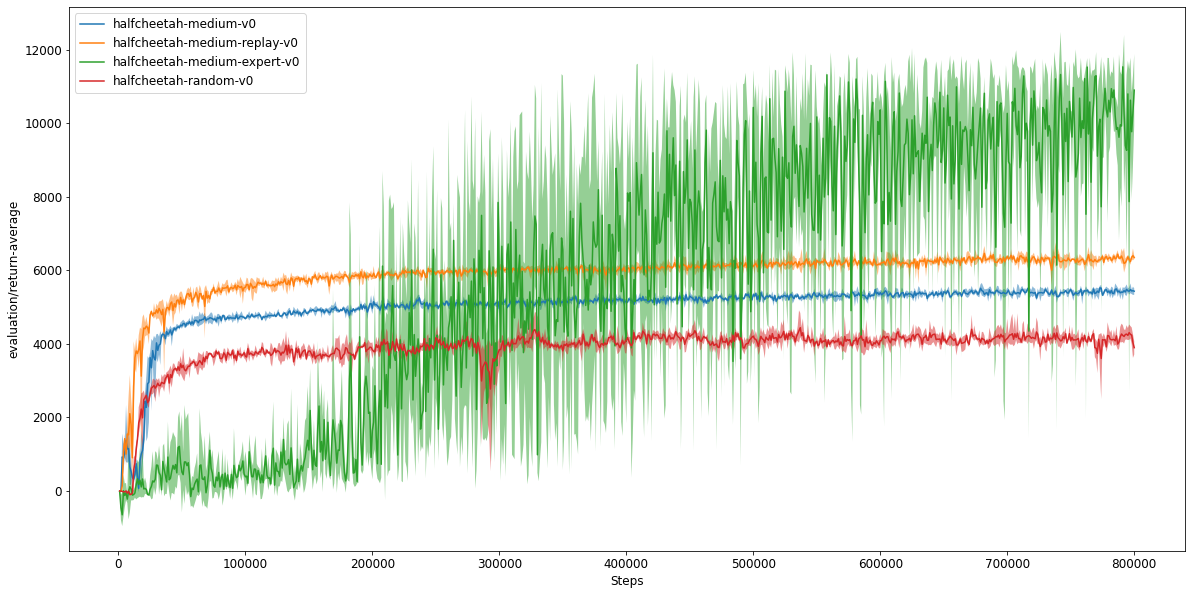

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set in [
    (MP521, MP522, MP523),
    (MP524, MP525, MP526),
    (MP527, MP528, MP529),
    (MP530, MP531, MP532),
]:
    stacked_data = np.vstack([i.sac.result[feature][:800] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'][:800], mean_vals, label=f'{exp_set[0].dataset}')
    ax.fill_between(exp.sac.result['timesteps_total'][:800], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass